# Project Description



**The World Happiness Report is a landmark survey of the state of global happiness. 
The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update.
The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event 
celebrating International Day of Happiness on March 20th.
The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.
Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations.
The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.**


# What is Dystopia?



**Dystopia is an imaginary country that has the world’s least-happy people.
The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably 
compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, 
thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables,
therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes,
lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, 
it is referred to as “Dystopia,” in contrast to Utopia.**


# What are the residuals?

**The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either
over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole
set of countries**


# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

**The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, 
Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value 
for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores**


# Prediction

**You need to predict the happiness score considering all the other factors mentioned in the dataset.**

In [154]:
#import necessory libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import pickle
import joblib

In [84]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [85]:
df.head(20) #Displaying the first 20 rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [86]:
df.tail(20) #Displaying the last 20 rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
138,Congo (Brazzaville),Sub-Saharan Africa,139,3.989,0.06682,0.67866,0.66290,0.31051,0.41466,0.11686,0.12388,1.68135
139,Comoros,Sub-Saharan Africa,140,3.956,0.04797,0.23906,0.79273,0.36315,0.22917,0.19900,0.17441,1.95812
140,Uganda,Sub-Saharan Africa,141,3.931,0.04317,0.21102,1.13299,0.33861,0.45727,0.07267,0.29066,1.42766
141,Senegal,Sub-Saharan Africa,142,3.904,0.03608,0.36498,0.97619,0.43540,0.36772,0.10713,0.20843,1.44395
142,Gabon,Sub-Saharan Africa,143,3.896,0.04547,1.06024,0.90528,0.43372,0.31914,0.11091,0.06822,0.99895
143,Niger,Sub-Saharan Africa,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
146,Madagascar,Sub-Saharan Africa,147,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230


**=>This Dataset Contains World Happiness Report with Happiness Score**

**==>Here our target variable or label is Happiness Score Which is continous in nature so it is regression problem**

**===>Other than Happiness Score are our features because happiness Score is dependent on those features in these features there is some categorical column we will see ,those columns give any importance to the label or not**

# You need to predict the happiness score considering all the other factors mentioned in the dataset.

# Exploratory Data Analysis (EDA)(Non Graphical Analysis)

In [87]:
df.shape #Checking dimension of the dataset

(158, 12)

**There is 158 rows and 12 columns presented in this dataset**

In [88]:
print(f"Columns Names : {df.columns}") #columns of the dataset

Columns Names : Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [89]:
df.dtypes #data types of the data

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

**There is 2 object ,1 int64 and 9 float64 datatypes columns presented in this dataset**

In [90]:
#Checking the null values

df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

**There is no null values presented in this dataset**

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

**Once again we can see there is no null values presented and we will deal categorical column,it required or not to build the model**

In [92]:
for i in df.columns:
    print(df[i].value_counts()) #checking the value count of each column
    print('\n')

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64


Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64


Happiness Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64


Standard Error
0

**We want to drop Country ,Region  and Happiness Rank column because they are not contributing to predict Happiness Score**

# Droping Column

In [93]:
df=df.drop(['Country','Region','Happiness Rank'],axis=1)

In [94]:
df.head() #Displaying the dataset after droping the column

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Checking for duplicated rows

In [95]:
print("Total no. of duplicated rows:",df.duplicated().sum())

Total no. of duplicated rows: 0


In [96]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**1)There is no negative value present**

**2)There is no missing values**

**3)The mean value is greater than the median(50%) in Standard Error,Trust(Government Corruption),Generosity and Dystopia which 
means the data is skewed to right.**

**4)The median is greater than the mean value in Economy (GDP per Capita),family,Health (Life Expectancy),Freedom which 
means the data is skewed to left.**

**5)By summarizing the data we can observe there is some difference between 75% and max hence there are outliers presented in the data**

**6)We will deal all of this if it required**

# Data Visualisation(Graphical Analysis)

# Univarite Analysis

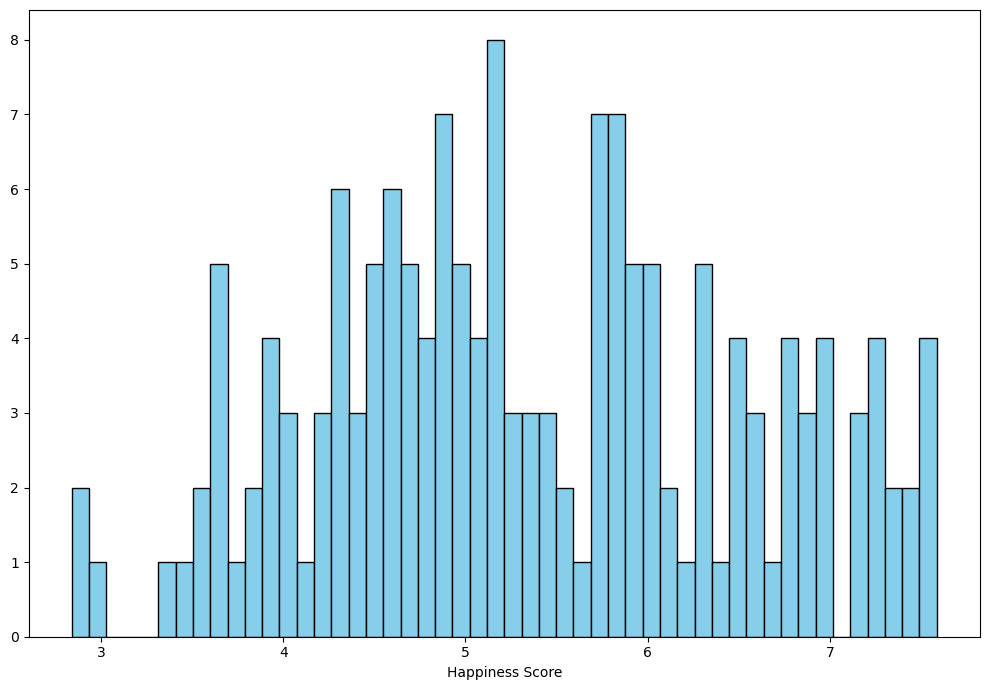

In [97]:
plt.figure(figsize=(10,7))
plt.hist(df['Happiness Score'],bins=50,color='skyblue',edgecolor='black')
plt.xlabel("Happiness Score")
plt.tight_layout()
plt.show()

**From Above analysis ,we can see Happiness Score from 3-7 is occured**

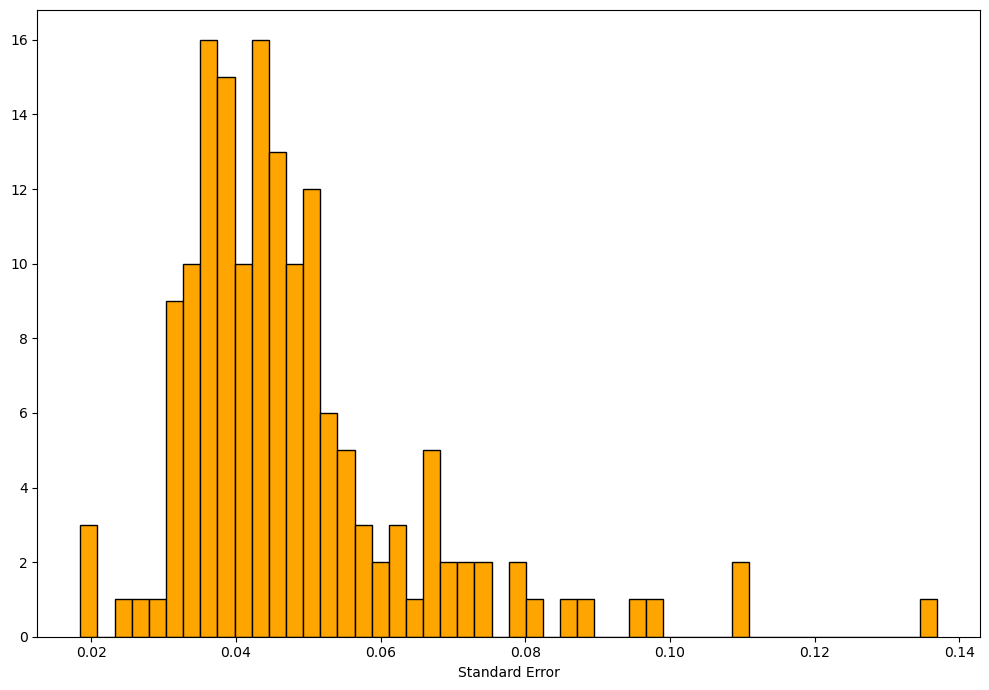

In [98]:
plt.figure(figsize=(10,7))
plt.hist(df['Standard Error'],bins=50,color='orange',edgecolor='black')
plt.xlabel("Standard Error")
plt.tight_layout()
plt.show()

**From Above analysis ,we can see Standard error from 0.02-0.14 is occured**

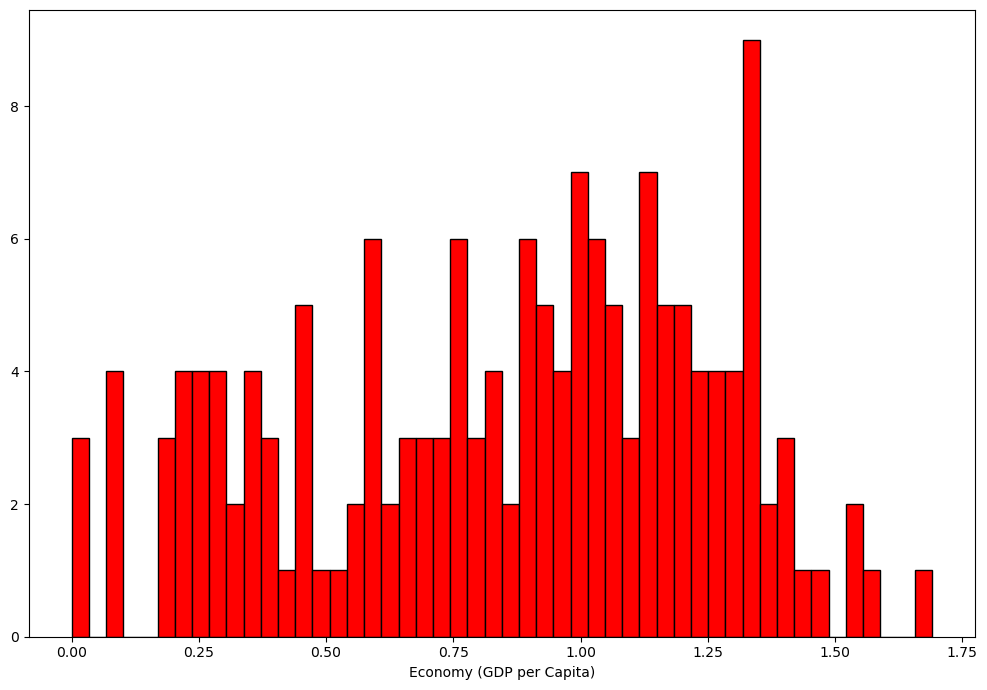

In [99]:
plt.figure(figsize=(10,7))
plt.hist(df['Economy (GDP per Capita)'],bins=50,color='red',edgecolor='black')
plt.xlabel("Economy (GDP per Capita)")
plt.tight_layout()
plt.show()

**From Above analysis ,we can see Economy(GDP per Capita) from 0.00-1.75 is occured**

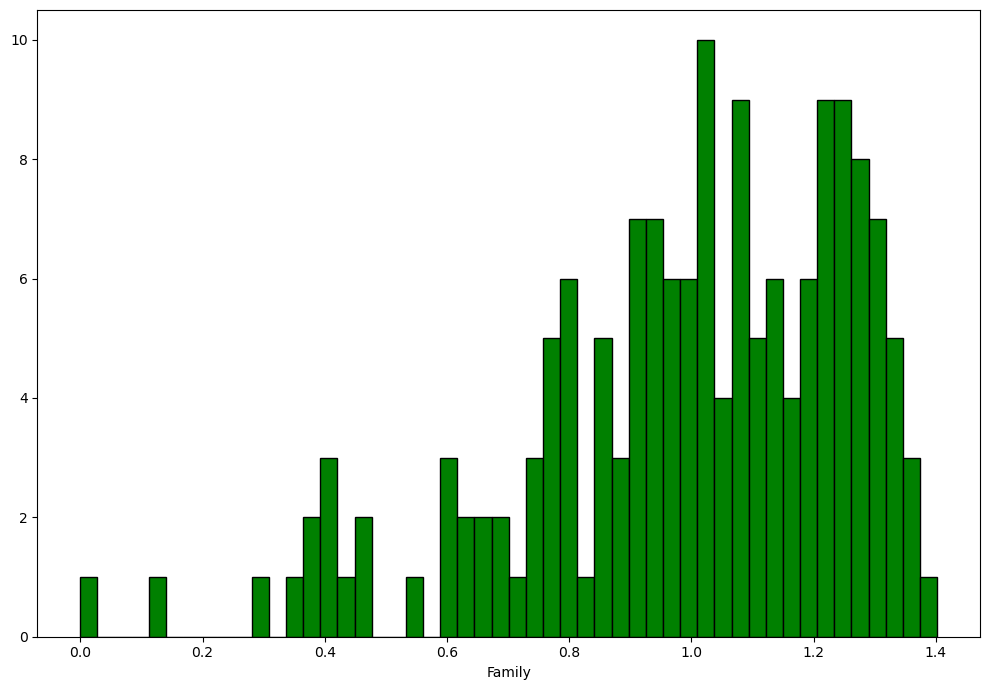

In [100]:
plt.figure(figsize=(10,7))
plt.hist(df['Family'],bins=50,color='green',edgecolor='black')
plt.xlabel("Family")
plt.tight_layout()
plt.show()

**From Above analysis ,we can see Family from 0.00-1.4 is occured**

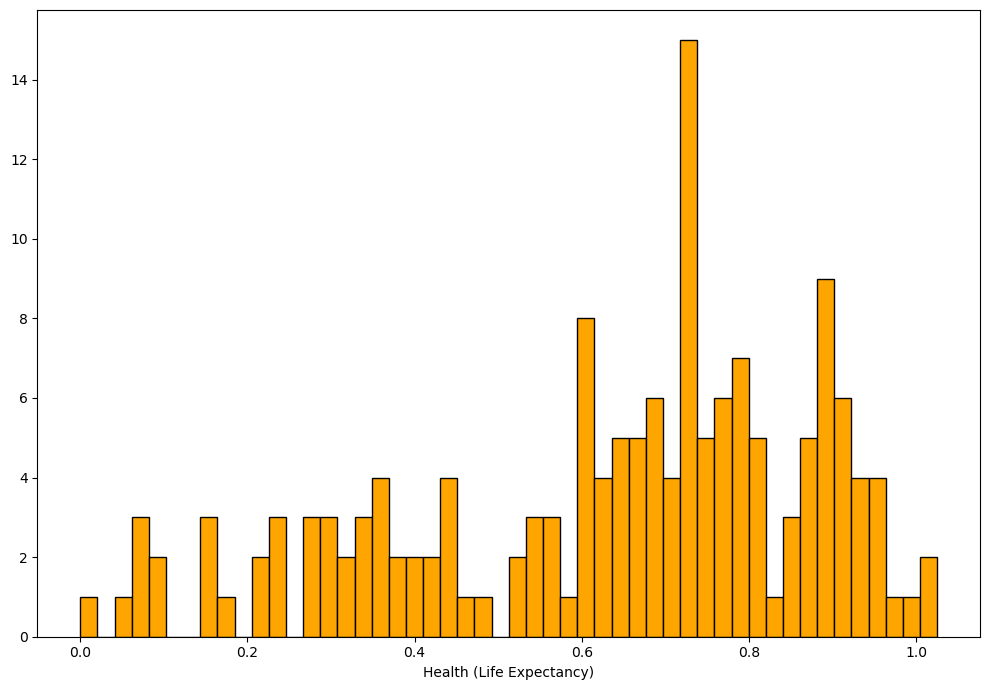

In [101]:
plt.figure(figsize=(10,7))
plt.hist(df['Health (Life Expectancy)'],bins=50,color='orange',edgecolor='black')
plt.xlabel("Health (Life Expectancy)")
plt.tight_layout()
plt.show()

**From Above analysis ,we can see Health (Life Expectancy) from 0.0-1.0 is occured,in some countries  have Life Expectancy between
0.0 to 0.2 ,for those countries the happiness score become very less**

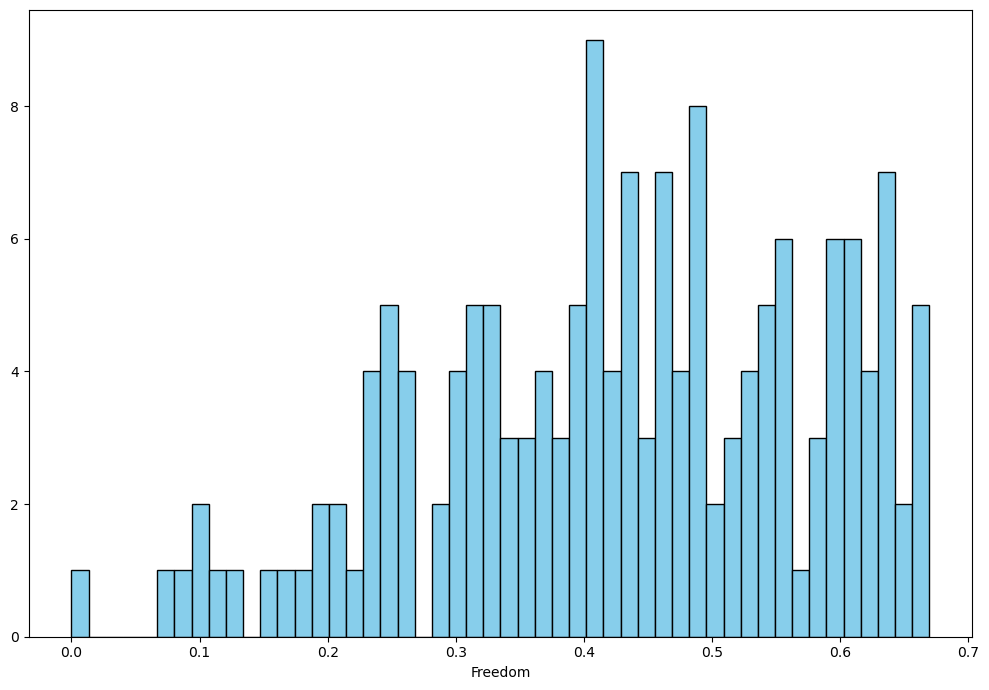

In [102]:
plt.figure(figsize=(10,7))
plt.hist(df['Freedom'],bins=50,color='skyblue',edgecolor='black')
plt.xlabel("Freedom")
plt.tight_layout()
plt.show()

**From Above analysis ,we can see Freedom from 0.0-0.7 is occured, it is in increasing trend**

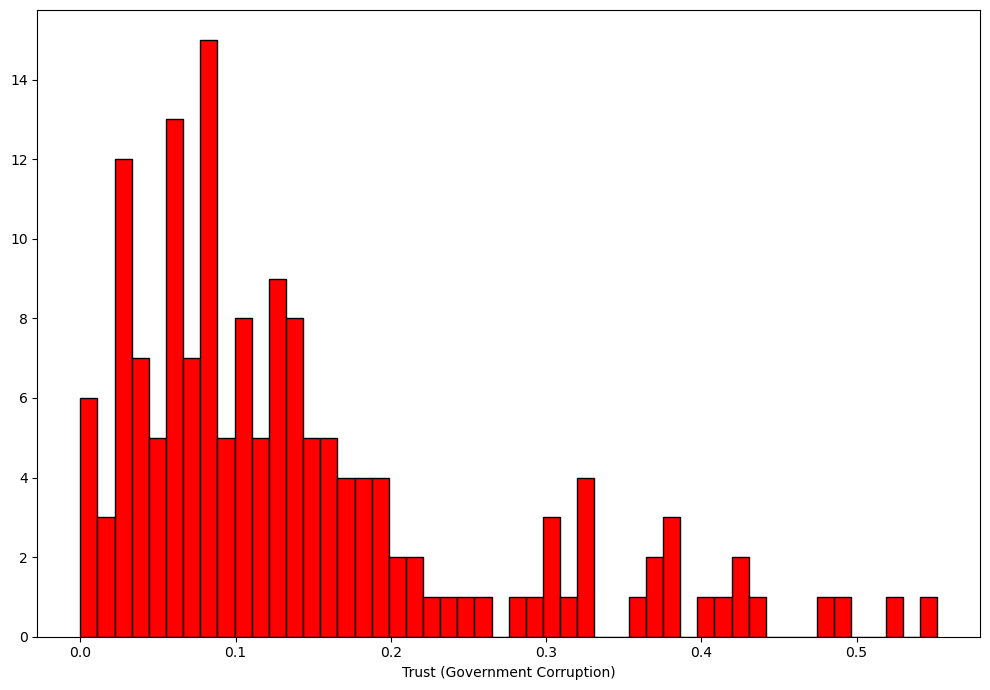

In [103]:
plt.figure(figsize=(10,7))
plt.hist(df['Trust (Government Corruption)'],bins=50,color='red',edgecolor='black')
plt.xlabel("Trust (Government Corruption)")
plt.tight_layout()
plt.show()

**From Above analysis ,we can see Trust (Government Corruption) from 0.0-0.5 is occured, it is in decreasing trend,it also affect
the happiness score**

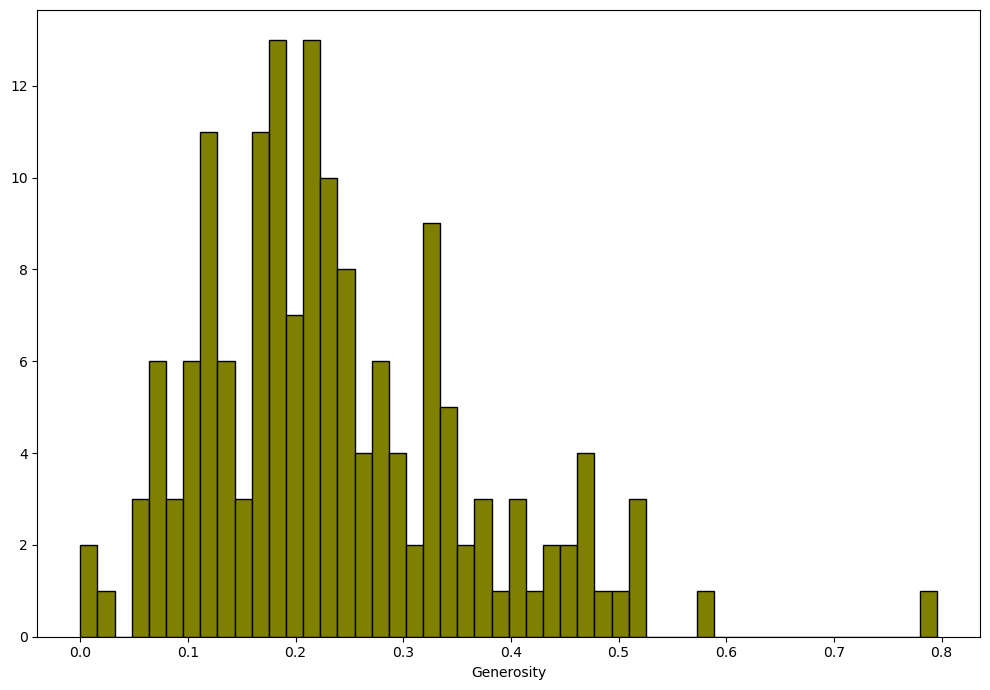

In [104]:
plt.figure(figsize=(10,7))
plt.hist(df['Generosity'],bins=50,color='olive',edgecolor='black')
plt.xlabel("Generosity")
plt.tight_layout()
plt.show()

**From Above analysis ,we can see Generosity from 0.0-0.8 is occured.**

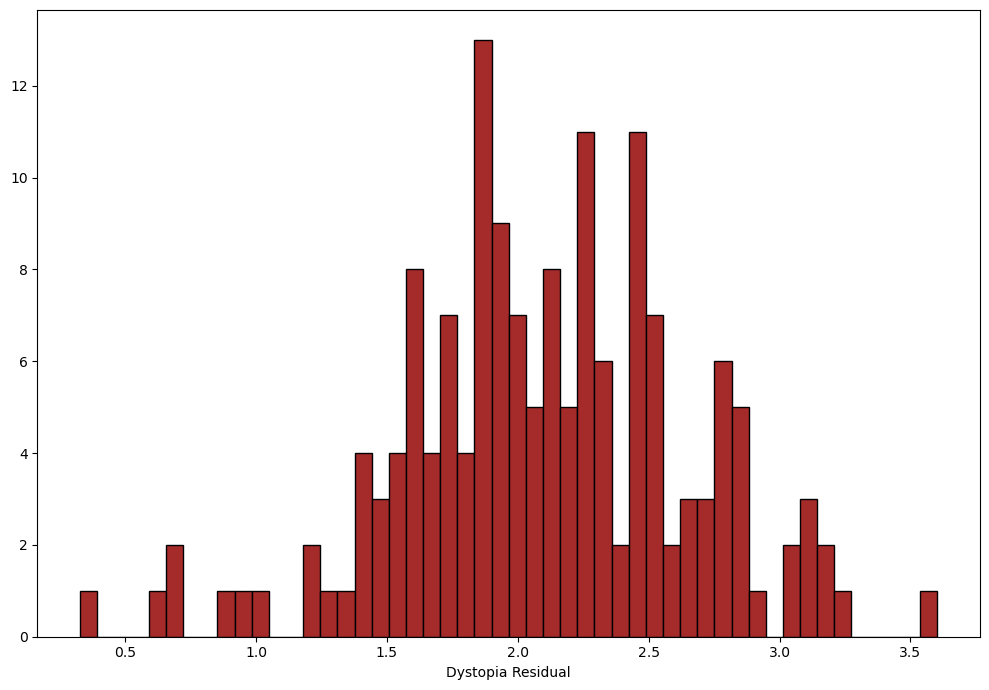

In [105]:
plt.figure(figsize=(10,7))
plt.hist(df['Dystopia Residual'],bins=50,color='brown',edgecolor='black')
plt.xlabel("Dystopia Residual")
plt.tight_layout()
plt.show()

**From Above analysis ,we can see Dystopia Residual from 0.5-3.5 is occured.**

# Bivariate Analysis(comparing each feature with target label)

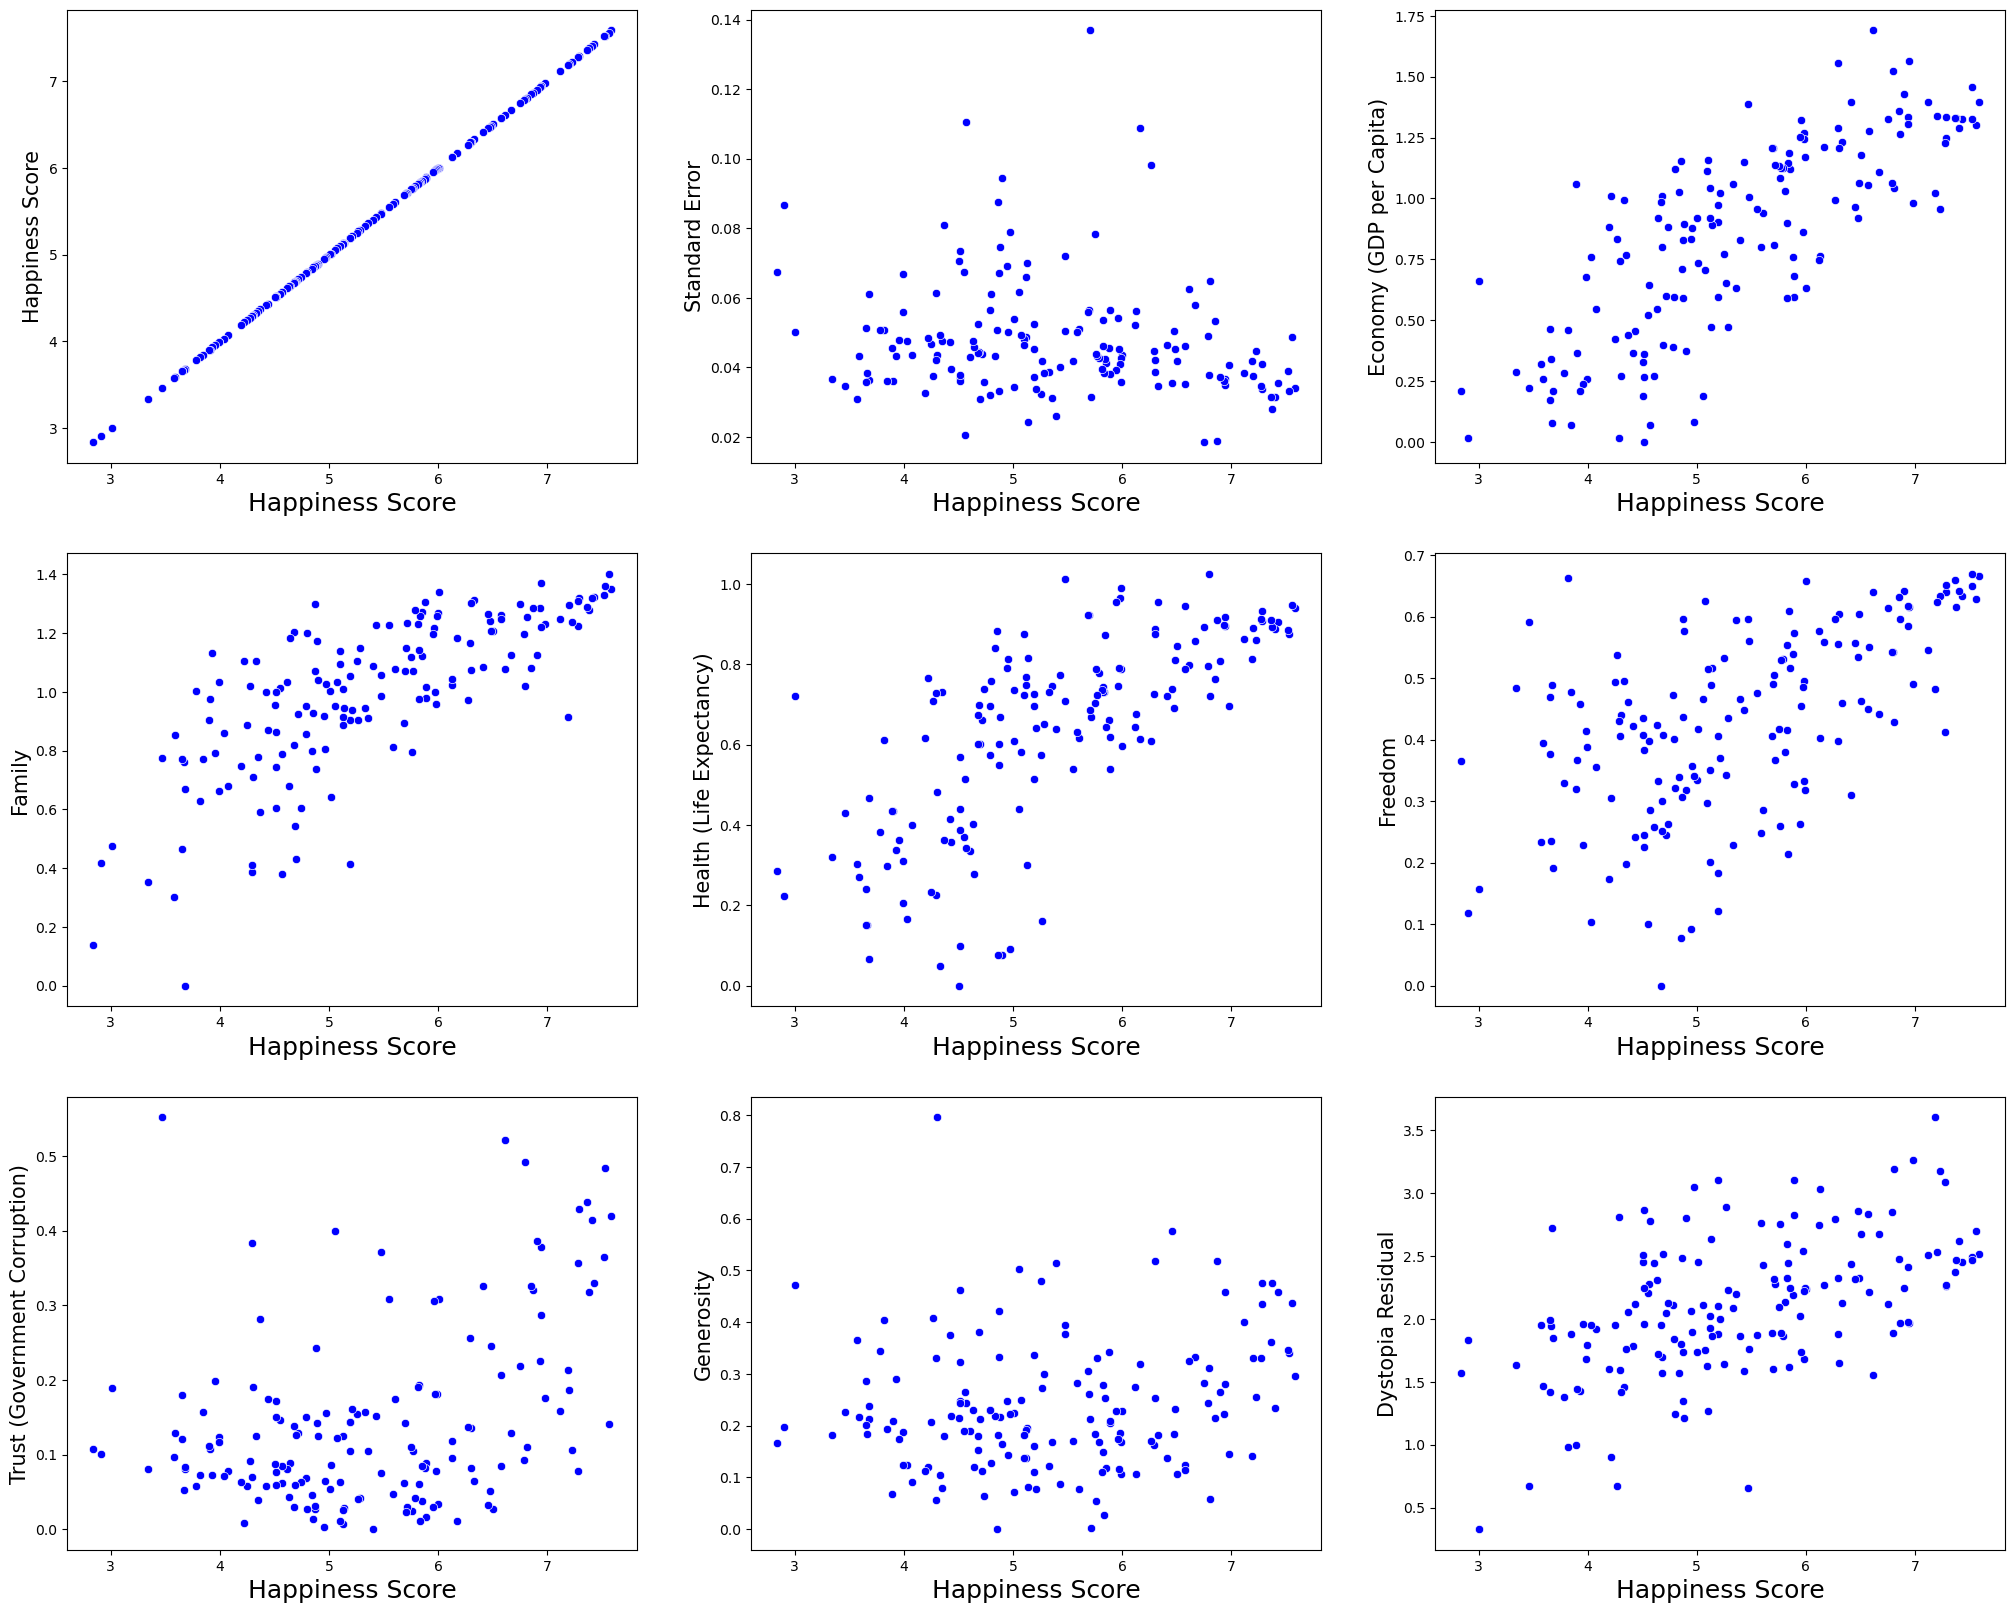

In [106]:
plt.figure(figsize=(25,20))
p=1
for i in df:
    if p<=10:
        plt.subplot(3,3,p)
        sns.scatterplot(x='Happiness Score',y=i,data=df,color='b')
        plt.xlabel('Happiness Score',fontsize=18)
        plt.ylabel(i,fontsize=15)
    p+=1
    
plt.show()

**There is a positive correlation between Economy(GDP per capita) and happiness score,countries with higher GDP tend to have higher happiness scores**

**Family column positively influences the happiness scores**

**Longer health(life Expectancy) contributes to higher happiness**

**Freedom has positive influences to happiness scores but also less pronounced impact on happiness scores**

**Generosity shows a weak correlation with happiness**

**Some countries with low corruption are happier but the trend is not strong**

# Checking outliers with Boxplot

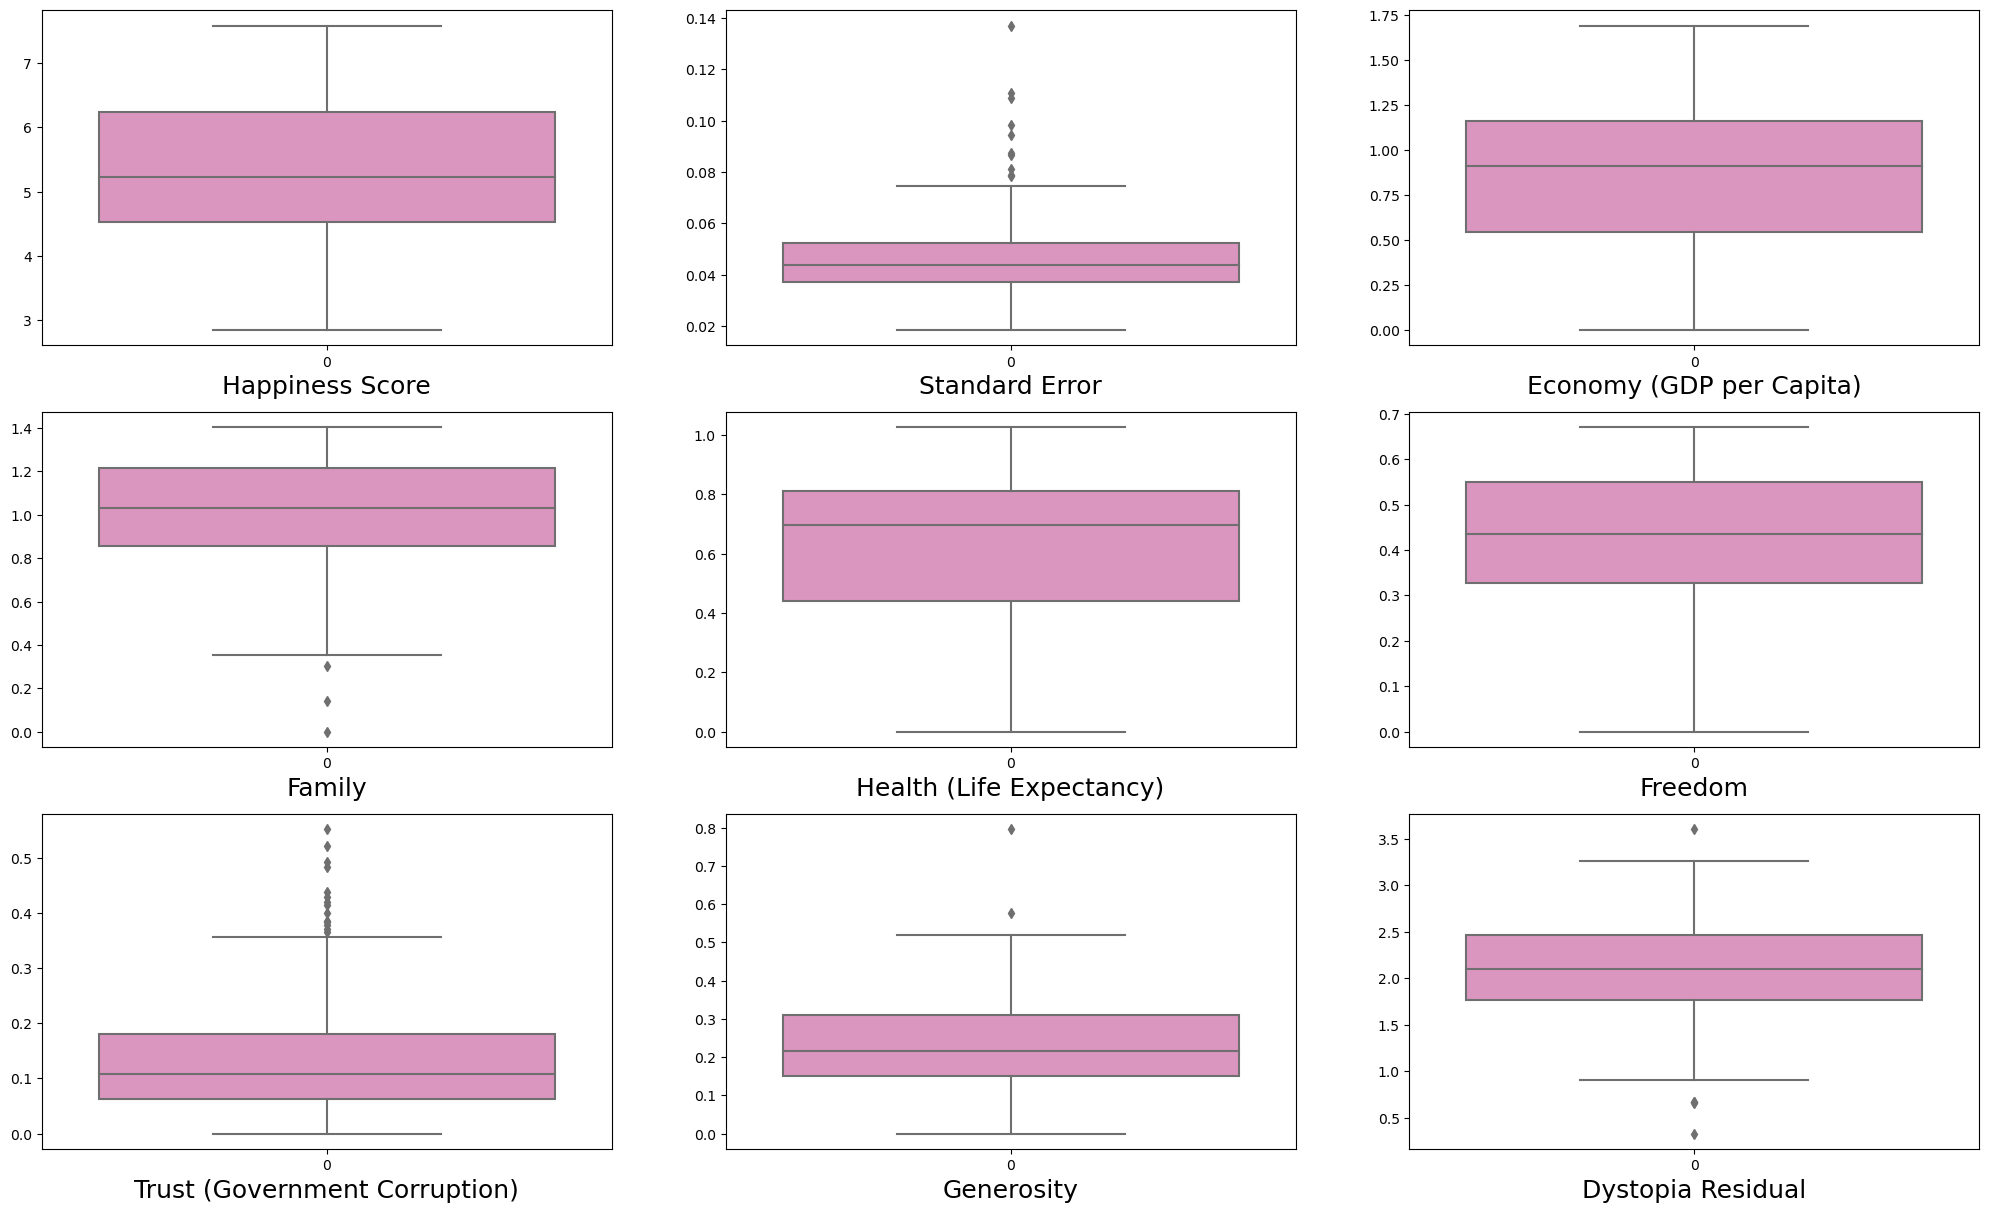

In [107]:
plt.figure(figsize=(25,20))
p=1
for i in df:
    if p<=17:
        plt.subplot(4,3,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i,fontsize=18)
    p+=1
    
plt.show()

**We can clearly see there is outliers presented in Standard Error,Family,Trust(Government Corruption),Generosity
and Dystopia Residual**

**We will deal this if it required**

# Outlier Removal

# Standard Error

In [108]:
q1=df['Standard Error'].quantile(0.25)
q3=df['Standard Error'].quantile(0.75)
IQR=q3-q1

In [109]:
lower_outliers=q1-1.5*IQR
upper_outliers=q3 + 1.5*IQR

In [110]:
df=df[(df['Standard Error']>=lower_outliers)&(df['Standard Error']<=upper_outliers)]

# Family

In [111]:
q1=df['Family'].quantile(0.25)
q3=df['Family'].quantile(0.75)
IQR=q3-q1

In [112]:
lower_outliers=q1-1.5*IQR
upper_outliers=q3 + 1.5*IQR

In [113]:
df=df[(df['Family']>=lower_outliers)&(df['Family']<=upper_outliers)]

# Trust(Government Corruption)

In [114]:
q1=df['Trust (Government Corruption)'].quantile(0.25)
q3=df['Trust (Government Corruption)'].quantile(0.75)
IQR=q3-q1

In [115]:
lower_outliers=q1-1.5*IQR
upper_outliers=q3 + 1.5*IQR

In [116]:
df=df[(df['Trust (Government Corruption)']>=lower_outliers)&(df['Trust (Government Corruption)']<=upper_outliers)]

# Generosity

In [117]:
q1=df['Generosity'].quantile(0.25)
q3=df['Generosity'].quantile(0.75)
IQR=q3-q1

In [118]:
lower_outliers=q1-1.5*IQR
upper_outliers=q3 + 1.5*IQR

In [119]:
df=df[(df['Generosity']>=lower_outliers)&(df['Generosity']<=upper_outliers)]

# Dystopia Residual

In [120]:
q1=df['Dystopia Residual'].quantile(0.25)
q3=df['Dystopia Residual'].quantile(0.75)
IQR=q3-q1

In [121]:
lower_outliers=q1-1.5*IQR
upper_outliers=q3 + 1.5*IQR

In [122]:
df=df[(df['Dystopia Residual']>=lower_outliers)&(df['Dystopia Residual']<=upper_outliers)]

# Checking for Skewness

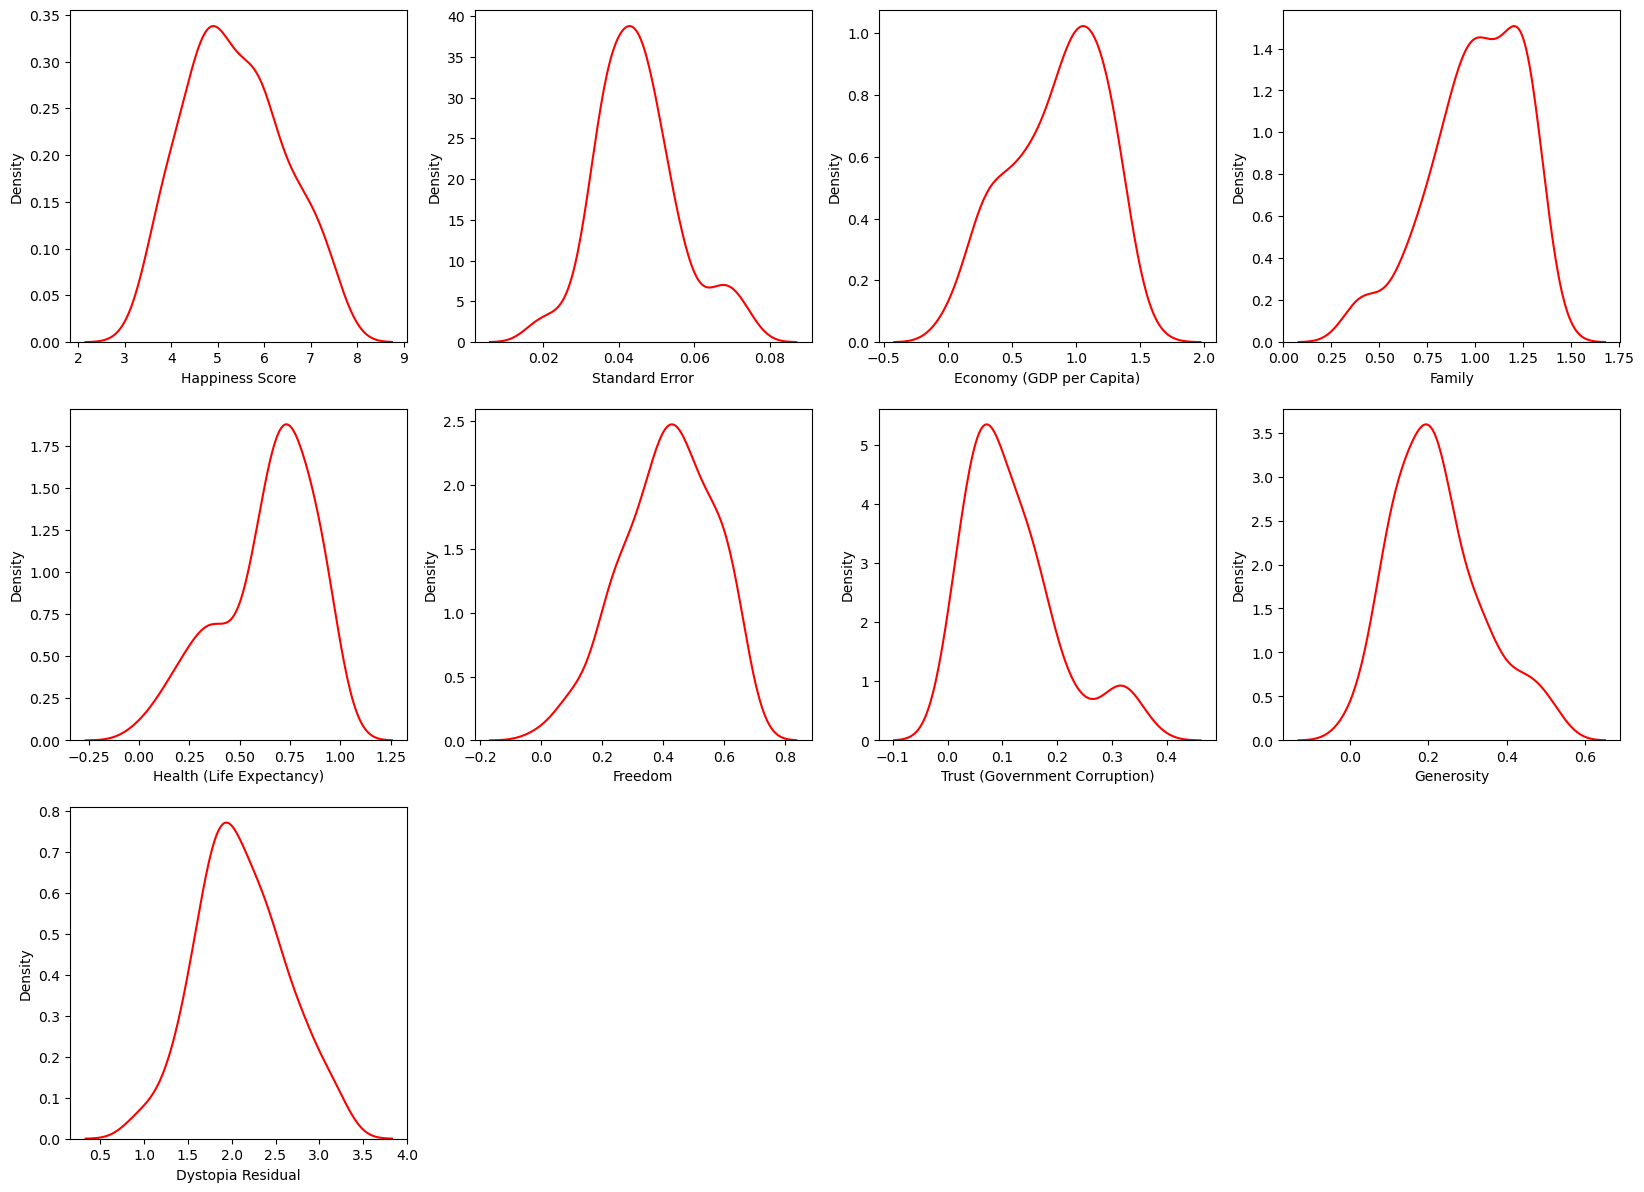

In [123]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<=13:
        plt.subplot(5,4,plotnumber)
        sns.distplot(df[i],color='r',hist=False)
        plt.xlabel(i)
    plotnumber+=1
    
plt.show()

**From above analysis,We clearly see almost all the columns have bell shaped curve**

# Checking Correlation

In [124]:
corr=df.corr()
corr

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.163527,0.758769,0.701881,0.737964,0.511007,0.423676,0.235058,0.563941
Standard Error,-0.163527,1.000000,-0.129393,-0.076314,-0.195844,-0.126936,-0.102618,-0.067865,-0.046525
Economy (GDP per Capita),0.758769,-0.129393,1.000000,0.622168,0.796864,0.264613,0.268758,-0.030311,0.055457
Family,0.701881,-0.076314,0.622168,1.000000,0.508650,0.426383,0.286418,0.102529,0.085502
Health (Life Expectancy),0.737964,-0.195844,0.796864,0.508650,1.000000,0.284083,0.147584,0.086006,0.110013
Freedom,0.511007,-0.126936,0.264613,0.426383,0.284083,1.000000,0.448188,0.416763,0.062500
Trust (Government Corruption),0.423676,-0.102618,0.268758,0.286418,0.147584,0.448188,1.000000,0.277956,0.109605
Generosity,0.235058,-0.067865,-0.030311,0.102529,0.086006,0.416763,0.277956,1.000000,0.019756
Dystopia Residual,0.563941,-0.046525,0.055457,0.085502,0.110013,0.062500,0.109605,0.019756,1.000000


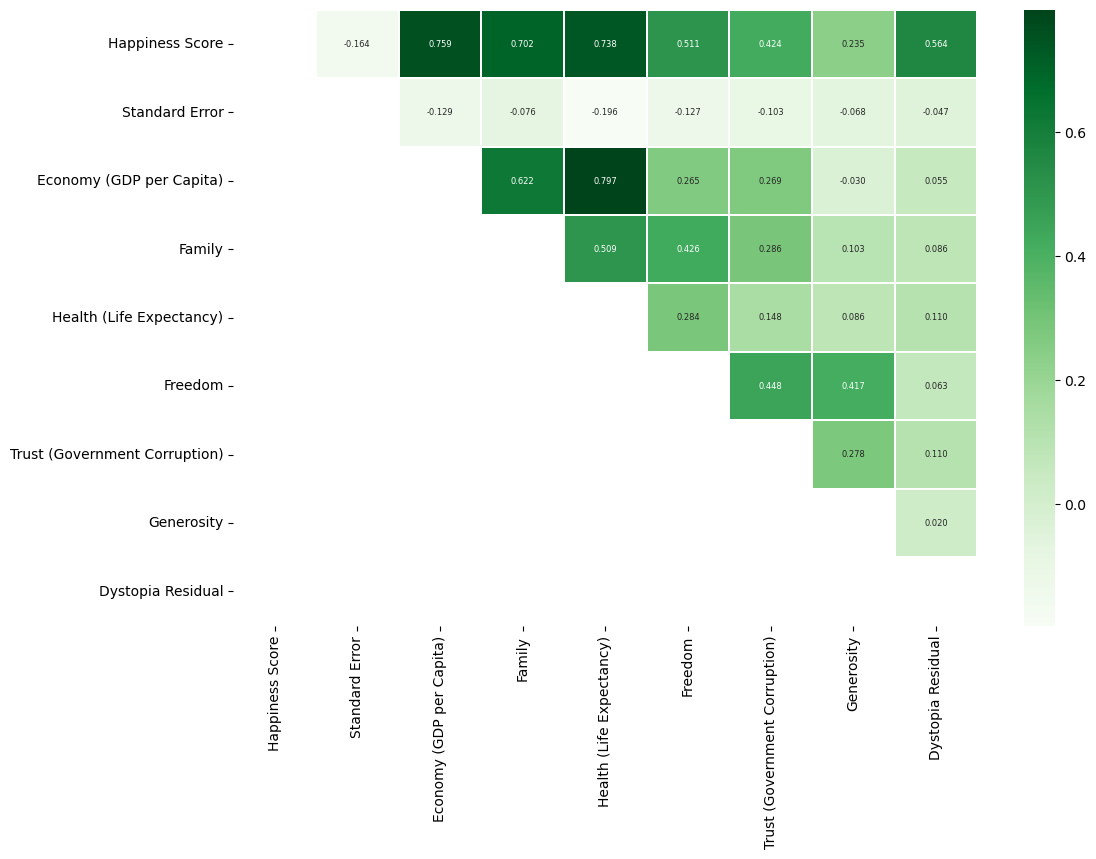

In [125]:
df_corr=df.corr()

lower_triangle=np.tril(df.corr())

plt.figure(figsize=(12,8))

sns.heatmap(df_corr,annot=True,annot_kws={"size":6},cmap='Greens',linewidths=0.1,fmt='.3f',mask=lower_triangle)

plt.show()

**=>0-no relation**

**==>-0.3 to 0.3 less relation**

**==>greater than -0.5 or 0.5 greater than(moderate correlation)**

**==>greater than -0.7 or 0.7 greater than(high correlation)**

**1) From above heatmap we can see,there are positive correlation and negative correlation between label and feature columns**

**2))Economy (GDP per Capita)  are positively correlated with Family,Health (Life Expectancy) a value of 0.622 and 0.797
which is close to 1(high correlation) we will deal multicollenearty based on vif(variance inflance factor)**

# Separting features and labels(to build model)

In [126]:
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

# Feature Scaling using Standard Scalarisation

In [127]:
scalar=StandardScaler()
x=pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.351043,1.230825,1.638891,1.339785,1.448513,0.278832,1.859107,1.196626
1,-0.559469,1.658612,1.341789,1.069217,1.727028,2.907305,1.084592,0.720308
2,-0.856020,1.296271,1.307027,1.157433,1.477071,2.490426,2.048248,0.693041
3,-1.539811,1.304871,1.130133,1.102179,1.360049,2.356052,2.204261,0.721093
4,-0.375372,1.316175,1.251258,1.269454,1.601302,2.805495,1.853210,0.320158
...,...,...,...,...,...,...,...,...
122,-0.604813,-1.391352,-1.035399,-2.106542,-1.228936,-0.764657,-0.330105,-0.330829
123,-0.822465,-1.849391,-2.268612,-1.717775,-0.261747,0.043000,0.560617,-0.232708
124,0.584112,-1.054403,-0.991509,-2.098982,0.359813,0.722867,-0.175827,-1.388769
125,-0.156812,-1.620181,-0.655019,-1.583161,-0.141528,0.124471,-0.038632,-1.292761


In [128]:
print("Feature Dimension",x.shape)
print("label Dimension",y.shape)

Feature Dimension (127, 8)
label Dimension (127,)


# Checking Variance inflation factor (VIF)

In [129]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

vif

,VIF values,features
0,1.054748,Standard Error
1,3.750928,Economy (GDP per Capita)
2,1.863868,Family
3,3.085243,Health (Life Expectancy)
4,1.654585,Freedom
5,1.399661,Trust (Government Corruption)
6,1.309594,Generosity
7,1.032631,Dystopia Residual


**If VIF value is greater than 10,consider it as a sign of multicollinearity but our features does not have the value greater than 10**

# Finding the best random state

In [130]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc> maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is ",maxAccu,"at random state",maxRS)

Best Accuracy is  0.9999999520031765 at random state 189


# Creating train test split

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=maxRS)

# Creating a Function with R2_score,Mean_Absolute_Error,Mean_Squared_Error ,and Random_mean_squared_error difference between R2 score and cross validation

In [132]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"R2_Score:{r2_score(y_train,y_pred)*100:.2f}%")  #r2_score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f"R2_Score:{r2_score(y_test,pred)*100:.2f}%")  #r2_score for test result
        
        print("\n Mean_Absolute_Error:",mean_absolute_error(y_test,pred))
        
        print("\n Mean_Squared_Error:",mean_squared_error(y_test,pred))
        
        print("\n Random_mean_squared_error:",np.sqrt(mean_squared_error(y_test,pred)))
              
        
        score=cross_val_score(clf,x,y)
        print('\n',score)
        print('\n',score.mean())
        print("\n Difference between R2_score and cross validation is:",r2_score(y_test,pred)-score.mean()) #Difference between r2_score and cross validation(to find which model is best)

# LinearRegression

In [133]:
clf=LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [134]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:100.00%

================Test Result=============
R2_Score:100.00%

 Mean_Absolute_Error: 0.00022426768768977942

 Mean_Squared_Error: 6.584629397780895e-08

 Random_mean_squared_error: 0.00025660532725921525

 [0.99999944 0.99999669 0.99999694 0.9999925  0.99999895]

 0.9999969012883965

 Difference between R2_score and cross validation is: 3.050714780017394e-06


# RandomForestRegressor

In [135]:
clf=RandomForestRegressor()
clf.fit(x_train,y_train)

RandomForestRegressor()

In [136]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:98.66%

================Test Result=============
R2_Score:88.36%

 Mean_Absolute_Error: 0.30703699999999967

 Mean_Squared_Error: 0.1596587780699997

 Random_mean_squared_error: 0.39957324493764557

 [-6.02190211 -4.17763385 -1.30237548 -4.20450202 -8.10609018]

 -4.762500726841685

 Difference between R2_score and cross validation is: 5.646121903862264


# KNeighborsRegressor

In [137]:
clf=knn()
clf.fit(x_train,y_train)

KNeighborsRegressor()

In [138]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:92.73%

================Test Result=============
R2_Score:93.26%

 Mean_Absolute_Error: 0.23083333333333325

 Mean_Squared_Error: 0.09240906266666661

 Random_mean_squared_error: 0.30398858969814413

 [-6.73193186 -5.16890374 -2.72550766 -5.90265315 -7.69442865]

 -5.644685013301909

 Difference between R2_score and cross validation is: 6.577325998809996


# GradientBoostingRegressor

In [139]:
clf=GradientBoostingRegressor()
clf.fit(x_train,y_train)

GradientBoostingRegressor()

In [140]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:99.96%

================Test Result=============
R2_Score:91.84%

 Mean_Absolute_Error: 0.2564965139768546

 Mean_Squared_Error: 0.11190917457894976

 Random_mean_squared_error: 0.3345282866648944

 [-3.21539836 -6.79166015 -1.41735352 -6.27911611 -5.41171942]

 -4.623049512433095

 Difference between R2_score and cross validation is: 5.541476434049728


# Ridge

In [141]:
clf=Ridge()
clf.fit(x_train,y_train)

Ridge()

In [142]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:99.99%

================Test Result=============
R2_Score:99.99%

 Mean_Absolute_Error: 0.007963794313064938

 Mean_Squared_Error: 9.295667332197625e-05

 Random_mean_squared_error: 0.009641404115686482

 [0.99626583 0.99894749 0.99897118 0.99855255 0.99678481]

 0.9979043724317469

 Difference between R2_score and cross validation is: 0.0020278693882139764


# DecisionTreeRegressor

In [143]:
clf= DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [144]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:100.00%

================Test Result=============
R2_Score:77.01%

 Mean_Absolute_Error: 0.43913333333333343

 Mean_Squared_Error: 0.31542366666666666

 Random_mean_squared_error: 0.5616259134572288

 [ -4.25296242 -19.36886967  -9.65970914 -21.17301465  -6.4270224 ]

 -12.176315656825736

 Difference between R2_score and cross validation is: 12.946396353231757


# SVR

In [145]:
clf=SVR()
clf.fit(x_train,y_train)

SVR()

In [146]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:98.78%

================Test Result=============
R2_Score:91.85%

 Mean_Absolute_Error: 0.23368226521792698

 Mean_Squared_Error: 0.11187379924207869

 Random_mean_squared_error: 0.3344754090244583

 [-9.83257011  0.3826683   0.56337667 -1.11446563 -6.66127374]

 -3.332452902632302

 Difference between R2_score and cross validation is: 4.250905610116254


# ExtraTreesRegressor

In [147]:
clf=ExtraTreesRegressor()
clf.fit(x_train,y_train)

ExtraTreesRegressor()

In [148]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:100.00%

================Test Result=============
R2_Score:93.16%

 Mean_Absolute_Error: 0.22153066666666688

 Mean_Squared_Error: 0.09381639168000024

 Random_mean_squared_error: 0.30629461581947576

 [-5.41080545 -1.06610297 -0.20469933 -2.29498831 -7.38840593]

 -3.2730003991134438

 Difference between R2_score and cross validation is: 4.204615551303148


# Checking Difference between r2_score and cross validation,the model Ridge has lowest value so Ridge is our best model

# Hyperparameter Tuning

In [149]:
param_grid_ridge={'alpha':[0.01,0.1,1.0]}

In [150]:
gscv=GridSearchCV(Ridge(),param_grid_ridge,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1.0]})

In [151]:
gscv.best_params_

{'alpha': 0.01}

# Final Model

In [152]:
World_happiness_model=Ridge(alpha=0.01)

In [153]:
World_happiness_model.fit(x_train,y_train)
pred=World_happiness_model.predict(x_test)
r2_score=r2_score(y_test,pred)
print(r2_score*100)

99.99999338045757


# Saving the model using Pickle

In [156]:
file_name='World_Happiness_Final_Model.pkl'

In [157]:
pickle.dump(World_happiness_model,open(file_name,'wb'))

# Predicting The Saved Model

In [158]:
model=joblib.load('World_Happiness_Final_Model.pkl')

In [159]:
prediction=model.predict(x_test)
prediction

array([5.83258213, 4.64220828, 6.78608588, 5.94814077, 7.4267364 ,
       3.34011888, 4.25196403, 4.0767986 , 4.67736368, 7.22555838,
       7.27748322, 6.85282224, 5.09757028, 4.78652106, 3.84513024,
       5.12418223, 7.28388855, 3.81933068, 5.19235026, 6.47663629,
       4.95943867, 5.2677305 , 5.9752502 , 3.98884483, 6.75000115,
       5.12883052, 5.79053161, 6.12267996, 6.29463983, 6.81011268])

In [160]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["original"]=a
df

,Predicted,original
0,5.832582,5.833
1,4.642208,4.642
2,6.786086,6.786
3,5.948141,5.948
4,7.426736,7.427
5,3.340119,3.340
6,4.251964,4.252
7,4.076799,4.077
8,4.677364,4.677
9,7.225558,7.226


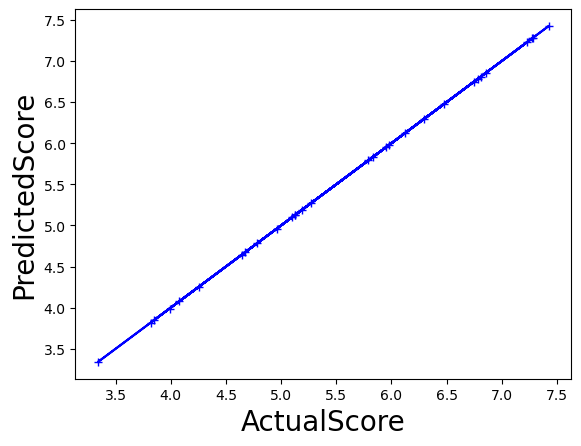

In [165]:
plt.xlabel('ActualScore',fontsize=20)
plt.ylabel('PredictedScore',fontsize=20)
plt.plot(a,prediction,color='blue',marker='+')
plt.show()